# Periods and eccentricties of G-dwarf binary stars

Figure 12.2 from Chapter 12 of *Stellar Structure & Evolution*, Pinsonneault & Ryden, Cambridge University
Press.

Eccentricity versus period for a sample of binary systems in which the primaries are main sequence stars
of spectral type from  G0v to G9v.

Data are from Porbaix et al. [2004, A&A, 424, 727](https://ui.adsabs.harvard.edu/abs/2004A%2526A...424..727P), [The ninth catalog of spectroscopic binary orbits (S<sub>B</sub><sup>9</sup>)](http://sb9.astro.ulb.ac.be).

In [1]:
import os
import sys
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [2]:
plotFile = 'Fig12_2.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

### SB9 catalog orbit data for types G0v to G9v

ASCII format table from the SB9 website, formatted to contain a basic header.  We only plot P and e.

In [3]:
dataFile = 'SB9_Gprimary.txt'
data = pd.read_csv(dataFile,sep=r'\s+',comment='#')
period = np.array(data['P'])
ecc = np.array(data['e'])

# range of periods and eccentricities

minP = 0.1 # days
maxP = 1e5 # days

eMin = -0.05 # keeps e=0 off lower horizontal axis
eMax = 1.05  # keeps e=1 off upper horizontal axis

## limiting envelope

Following Raghavan et al. 2010 [cite](website), we draw a limiting P-e envelope defined as a line of constant
minimum periastron distance of q=1.5R$_\odot$ for a total mass of M$_{tot}$=1.5M$_\odot$.  

Periastron distance is $q=a(1-e)$

Kepler's 3rd law: $P^2 = a_{AU}^{3/2} (M_{tot}/M_\odot)^{-1}$ for P in years, 1 year = 365.25d

Compute P as a function of e:
\begin{equation}
   P(e) = 365.25 \left(\frac{q}{1-e}\right)^{3/2}\left(\frac{M_{tot}}{M_\odot}\right)^{-1/2} {\rm days}
\end{equation}

In [4]:
Rsun = 6.957e5 # km
au2km = 1.495978707e8 # km

q_lim = 1.5*Rsun/au2km # q = 1.5 Rsun in au
Mtot = 1.5 # Msun

e_lim = np.linspace(0.0,0.9999,500) # avoid e=1, singular
P_lim = 365.25 * (q_lim/(1-e_lim))**1.5 * (Mtot)**-0.5

### Figure 12.2

Points as gray filled circles so we can see overlaps, and make sure dashed lines for e=0 and the 
limiting envelope are in the layer behind the points.

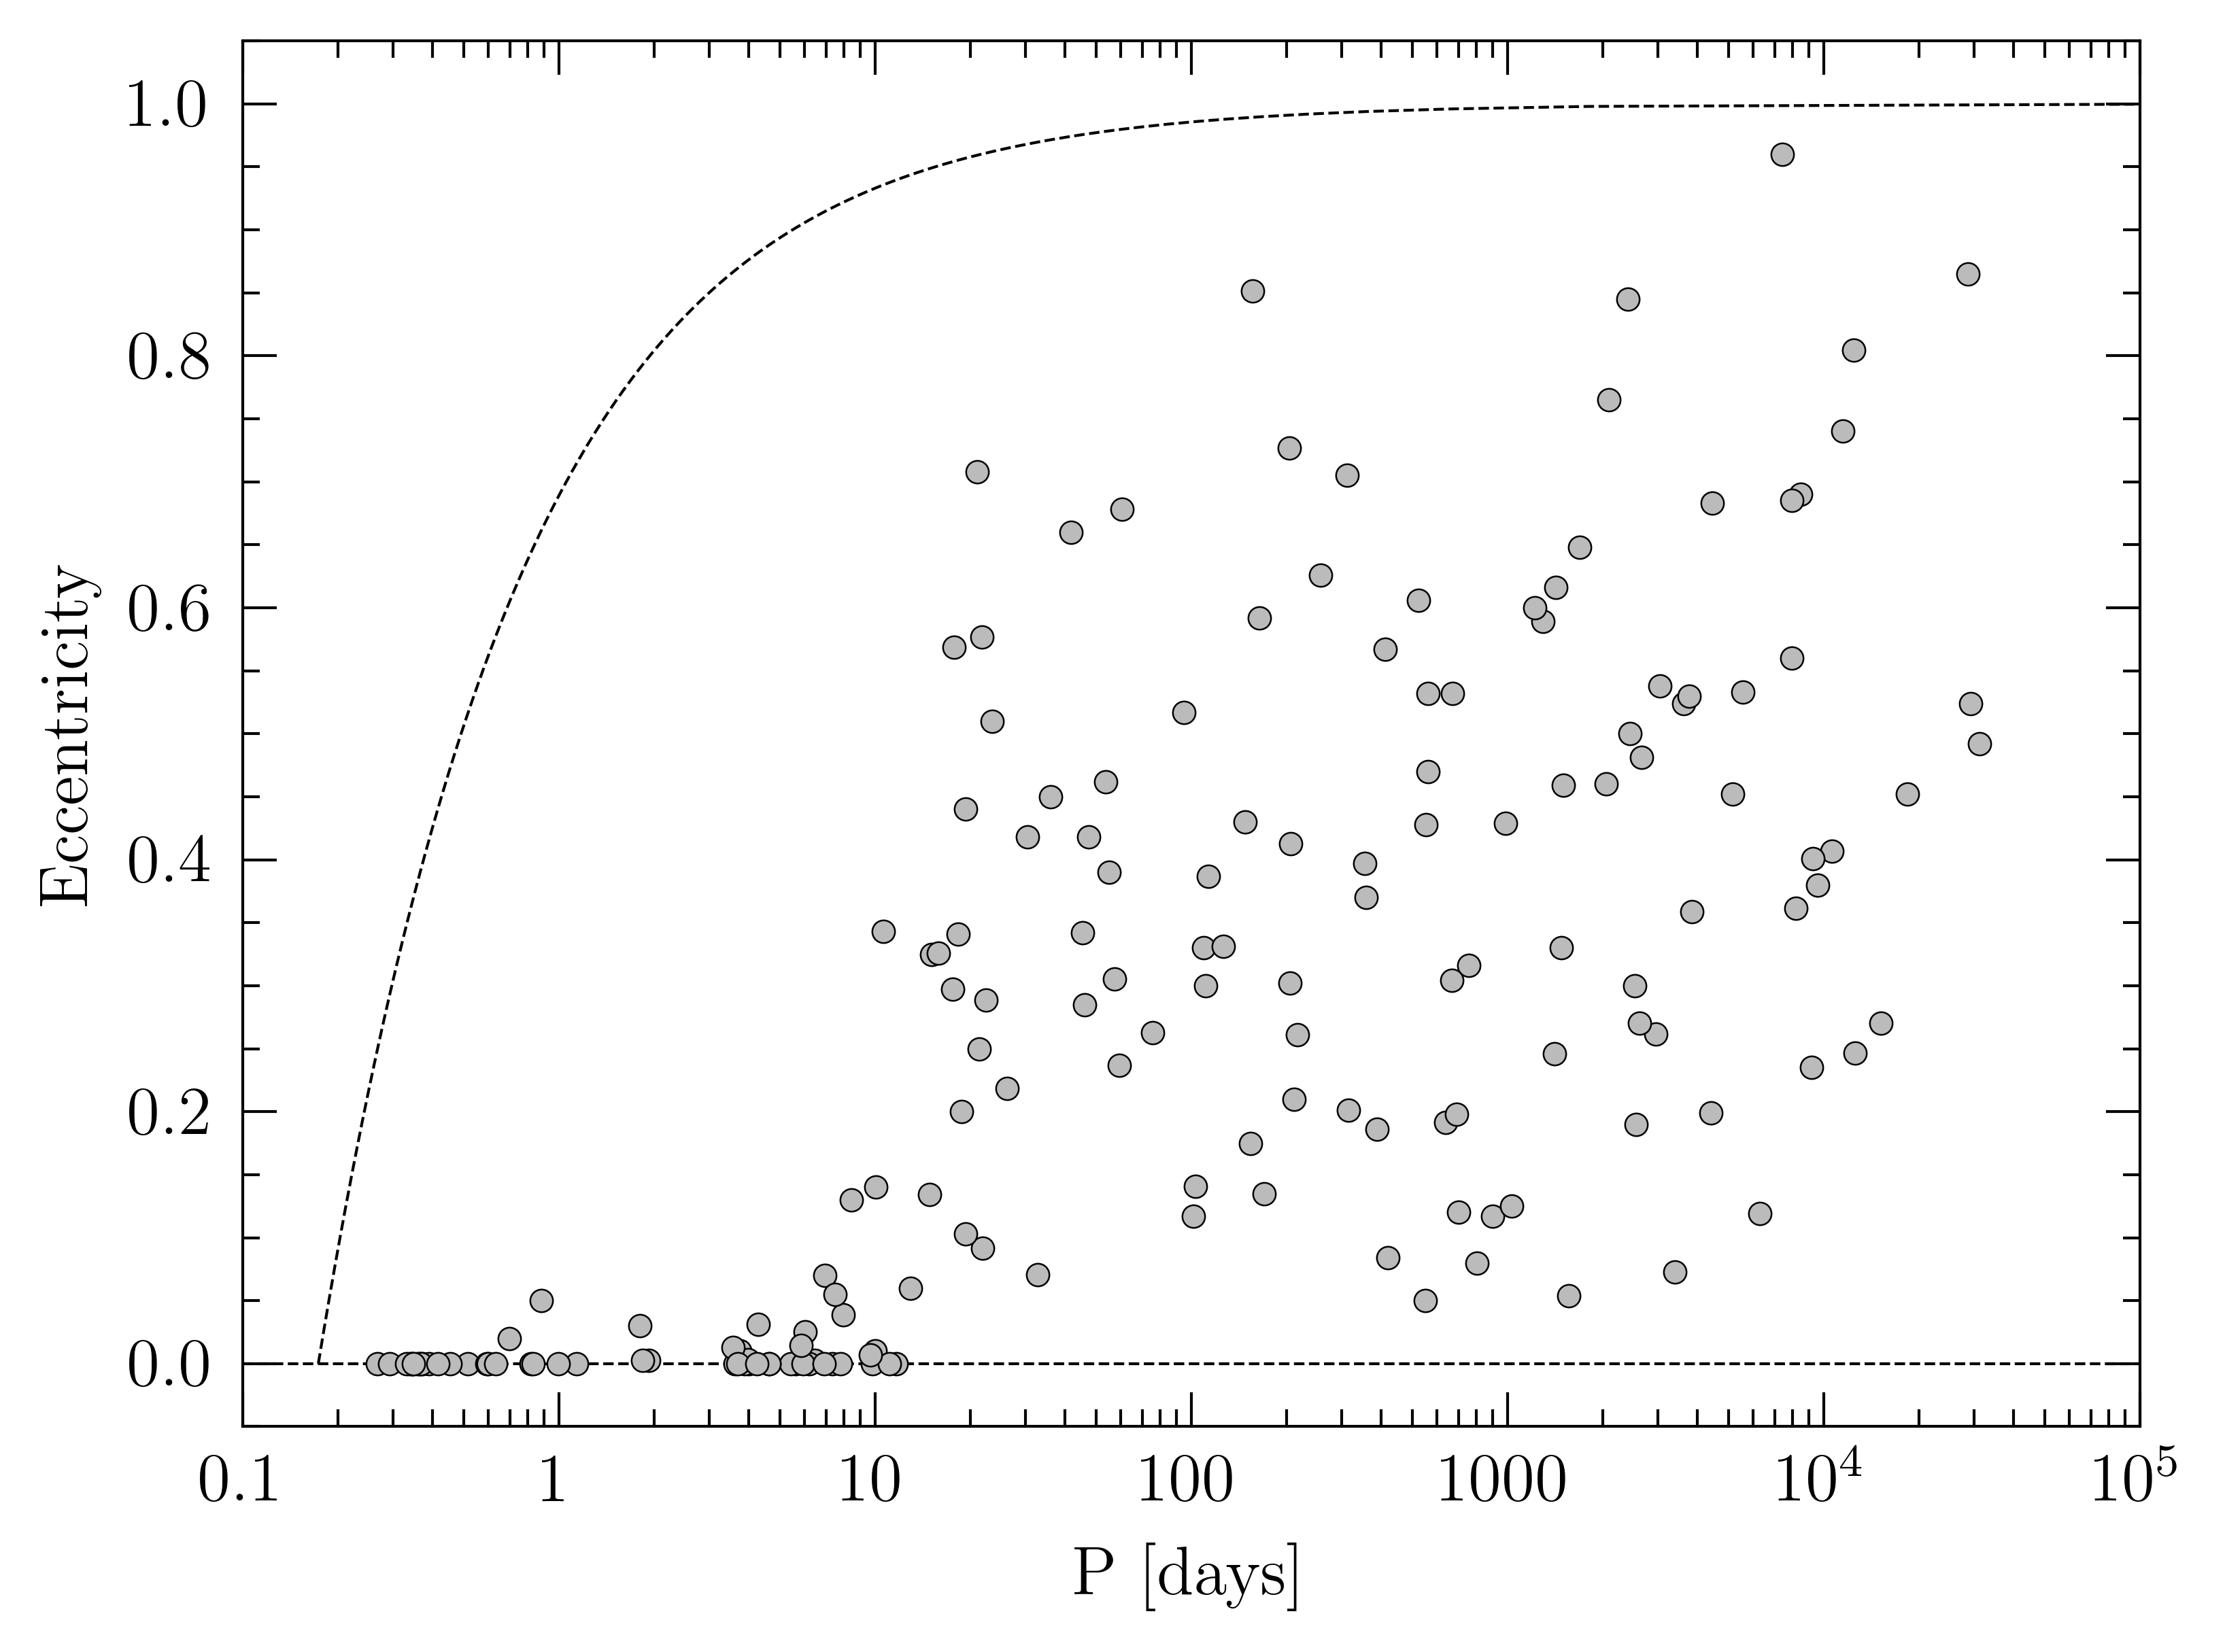

In [5]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

ax.set_xlim(minP,maxP)
ax.set_xscale('log')
ax.set_xticks([0.1,1,10,100,1e3,1e4,1e5])
ax.set_xticklabels(['0.1','1','10','100','1000',r'10$^4$',r'10$^5$'])
ax.set_xlabel(r'P [days]',fontsize=axisFontSize)

ax.set_ylim(eMin,eMax)
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.set_ylabel(r'Eccentricity',fontsize=axisFontSize)

ax.plot(period,ecc,'o',mfc='#bbbbbb',mec='black',mew=0.3,ms=4,zorder=10)

# horizontal dashed line at e=0

ax.hlines(0.0,minP,maxP,ls=['--'],colors=['black'],lw=0.5,zorder=9)

# plot the limiting P-e curve for Mtot=1.5Msun and q=1.5Rsun

ax.plot(P_lim,e_lim,'--',color='black',lw=0.5,zorder=9)

# make the PNG file

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')